In [ ]:
import matplotlib.pyplot as plt
import scipy.integrate
import numpy as np

When considering the probability of a certain result from a roll of a pair of dice, we assume each die is individually fair. Then, we ask about how many distinct outcomes there are to the roll. We can entirely determine an outcome by specifying the roll of each die, so as the dice are distinguishable, this amounts to specifying an ordered pair (m, n) where m and n are each integers between 1 and 6 inclusive. We assume each pair is equally likely, since the dice are individually fair. There is a total of 6 possible results for the first die and 6 for the second, so that there are $6^2 = 36$ possible outcomes to the dice roll. We then ask about the sum of the results, that is, m + n. To get snake eyes, we must roll a 1 and a 1, which we can only do a single way, so the net probability for this result is $\frac{1}{36}$. Then, we note there are 6 pairs that sum to 7; we can have (1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1). Thus, we have 6 our of 36 results giving us a sum of 7, so that the probability to roll a 7 is $\frac{6}{36} = \frac{1}{6}$. Clearly, the 7 is the more likely result, and the ratio of the probability of getting a 7 to that of getting snake eyes is 6:1. 

We examine now the convolution of the two dice probability functions, which ought to give the probability of a result on the sum of the dice. To do this effectively, we must define the probability functions of both dice; each is a function $p: \{1, 2, 3, 4, 5, 6\} \to [0, 1]$ defined by $p(x) = \frac{1}{6}$. Then, the convolution of the two probabilities ought to be $P(x) = \sum_n p(n)p(x - n)$. The left factor is defined only for n in the domain, but the one on the right is defined for x - n in the domain of p. The first condition gives $1 \leq n \leq 6$, while the second gives $-6 \leq n - x \leq -1$, or $x - 6 \leq n \leq x - 1$. For $x \leq 1$, $x \geq 12$, no n satisfy both these equalities, so the convolution is zero. For x = 2, the only n satisfying both these requirements is n = 1. For x = 3, we have n = 1, n = 2 as solutions to both inequalities, adding another integer at each step until we reach x = 7, where x - 6 = 1, x - 1 = 6, and the two inequalities match and we have 1 to 6 as valid n in the range of the inequalities. We then get to x = 8, and lose n = 1, and we lose another integer at each increase of x up to 12, where only n = 6 fulfills both inequalities. I am skipping the derivation of the exact number of each of these integers because it is tedious to do explicitly and easily seen what the process is - we plug in a value for x, intersect the two intervals our conditions give us, and then just count the integers within. If we call the number of such integers N for some x, then we note the sum in the convolution will only be defined for N values, but for those values, as the p function is just 1/6 everywhere it is defined, the sum reduces to summing N copies of $\frac{1}{6^2}$, so that $P(x) \sum_n p(n)p(x - n) = N \cdot \frac{1}{36}$. To fully define this function, I will just list the values for N we would get for a given value of x as pairs (x, N): (2, 1), (3, 2), (4, 3), (5, 4), (6, 5), (7, 6), (8, 5), (9, 4), (10, 3), (11, 2), (12, 1).

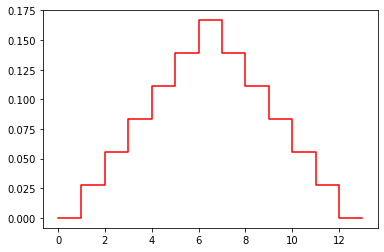

In [30]:
def checker(x, n):
    if (x - 6 <= n) & (n <= x - 1):
        return 1
    else:
        return 0
    
def P(x):
    if x < 2 or x > 12:
        return 0
    sum = 0
    for n in range(1, 7):
        sum += (1 / 6)*(1 / 6) * checker(x, n)
    return sum

x = np.array(range(14))
F = []
for z in x:
    F.append(P(z))
plt.step(x, F, 'r')
plt.show()

The above is an implementation of what I wrote above. The "checker" method simply checks if integers are in the allowed range for our given x. So we have our desired probability distribution. To calculate the mean, we do a sum over outcomes weighted by probability values for each outcome.

In [26]:
avg = 0
for n in range(13):
    avg += n * P(n)
print(avg)

7.0


This makes sense - the probability mass function is symmetric about 7, so the mean, or expected value, ought to live there too. We find the variance by applying the standard statistical formula for it: $\sigma^2 = \sum_n (n - \mu)^2 \cdot P(n)$. For us, the sum will just be over the integers:

In [27]:
var = 0
for n in range(13):
    var += P(n) * (n - avg)**2 
print(var)

5.833333333333334


This gives a standard deviation a little bigger than 2, which seems all right with our graph. Now, to move to 10 dice, we use that convolution is associative, and successively convolve our result 8 additional times. To do this, I throw up my hands and pass to numpy's convolve function. Check it works right:

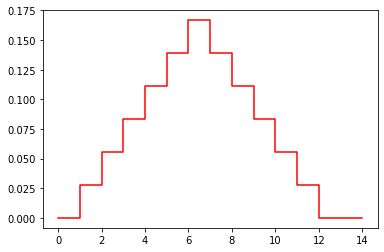

In [13]:
a = np.zeros((1, 8))
b = np.zeros((1, 8))
for i in range(1, 7):
    q = 1 / 6
    a[0][i] = q
    b[0][i] = q
p = np.convolve(a[0], b[0])
x = np.array(range(15))
plt.step(x, p, 'r')

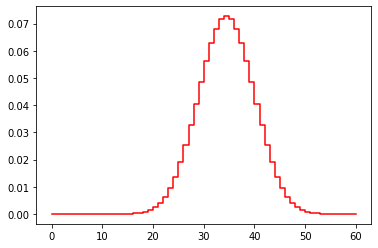

In [64]:
a = np.zeros((1, 7))
b = np.zeros((1, 7))
for i in range(1, 7):
    q = 1 / 6
    a[0][i] = q
    b[0][i] = q
p = np.convolve(a[0], b[0])
for i in range(8):
    p = np.convolve(p, a[0])
x = np.array(range(61))
plt.step(x, p, 'r')

The above is not Gaussian - the Gaussian distribution is known to be continuous, while this is a distribution of a variable which is discrete. For a Gaussian, there is a nonzero probability of obtaining any real number in a sample, while for this sample we are clearly restricted to the integers. However, it is approaching the the normal distribution, as per the central limit theorem -- the sum of sufficiently many identical independent random variables tends to approach the normal.

For the sum and averages of Gaussian distributions, we note that the average of two Gaussian distributions is just the sum, divided by two, which is equivalent to a choice of normalization, and thus should not affect the distribution. Thus, if the sum is normally distributed, so is the average. We note first that the probability of obtaining a given sum from two Gaussians is the convolution of their probability density functions, as we saw in class, so we need only convolve two Gaussians. Convolution of two functions is a multiplication of their individual Fourier transforms, so we note from basic quantum mechanics that the Fourier transform of a Gaussian is a Gaussian, to get that the product of Fourier transforms of Gaussians is a product of Gaussians, which is then of course itself a Gaussian, which Fourier transforms back to a Gaussian. To discover how the standard deviations vary, as this is the fourth consecutive day this three (3) credit class has had an assignment due, each of which involved several hours of work beyond what is normal for even the physics department, I shall cite Valko, Introduction to Probability, to get that the standard deviation of a sum is the sum in quadriture of the individual standard deviations - $\sigma_{net} = (\sigma_a^2 + \sigma_b^2)^{\frac{1}{2}}$. This means that when integrating a signal, the variance is no wider than that of the most spread out signal, and even when adding very many Gaussian variables, we maintain some level of discernability in our data. In other words, we are never worse than the weakest random variable in our collection.